In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('living-planet-index.csv', delimiter=';')
df.to_excel('living-planet-spread.xlsx')
df=pd.read_excel('living-planet-spread.xlsx')
df

,Unnamed: 0,Region,Year,Average Index,Upper Index,Lower Index
0,0,Africa,1970,100.000000,100.000000,100.000000
1,1,Africa,1971,95.461969,104.910803,87.790567
2,2,Africa,1972,94.683413,110.867839,81.479839
3,3,Africa,1973,99.181174,120.870721,81.908753
4,4,Africa,1974,99.384934,127.877780,77.144610
...,...,...,...,...,...,...
337,337,World,2014,31.669021,38.071988,26.383458
338,338,World,2015,31.627531,38.068720,26.281212
339,339,World,2016,31.145408,37.562137,25.770213
340,340,World,2017,30.885270,37.343040,25.465452


In [18]:
df.describe()

,Year,Average Index,Upper Index,Lower Index
count,342.000000,342.000000,342.000000,342.000000
mean,1993.929825,67.378353,86.514159,54.060560
std,14.123701,30.558825,33.736008,29.647613
min,1970.000000,6.413632,11.390088,3.702799
25%,1982.000000,43.169720,63.991163,27.245676
50%,1994.000000,70.800361,96.008820,53.705359
75%,2006.000000,92.910567,108.315840,78.901598
max,2018.000000,130.741073,152.570576,112.142994


In [3]:
region=df['Region']
pd.unique(region)

array(['Africa', 'Asia and Pacific', 'Europe and Central Asia',
       'Freshwater', 'Latin America and the Caribbean', 'North America',
       'World'], dtype=object)

In [4]:
def save_groupby(df, group_col):
    grouped=df.groupby('Region')
    groups=[]
    for name, group in grouped:
        groups.append(group)
    return tuple(groups)

africa, asia, euro, fresh, latin, nam, world=save_groupby(df, 'Region')


In [5]:
grouped=df.groupby('Region')

In [6]:
africa2={'Region':'Africa', 'Year':'2018', 'Average Index':'34.445875', 'Upper Index': '73.433580', 'Lower Index': '15.991854'}
africa=africa.append(africa2, ignore_index=True)
africa.tail()

C:\Users\Katerade\AppData\Local\Temp\ipykernel_17516\1375173488.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  africa=africa.append(africa2, ignore_index=True)


,Region,Year,Average Index,Upper Index,Lower Index
44,Africa,2014,32.492869,68.628636,15.238575
45,Africa,2015,31.293573,66.256152,14.669147
46,Africa,2016,32.054221,68.026893,14.968882
47,Africa,2017,34.445875,73.43358,15.991854
48,Africa,2018,34.445875,73.433580,15.991854


In [7]:
for name, group_df in grouped:
    min_year=group_df['Year'].min()
    max_year=group_df['Year'].max()
    print("{} : {}-{}".format(name, min_year, max_year))

Africa : 1970-2017
Asia and Pacific : 1970-2018
Europe and Central Asia : 1970-2018
Freshwater : 1970-2018
Latin America and the Caribbean : 1970-2018
North America : 1970-2018
World : 1970-2018


In [8]:
for name, group in grouped:
    min_average=group['Average Index'].min()
    print('{} : {}'. format(name, min_average))

Africa : 31.2935728
Asia and Pacific : 43.9966301
Europe and Central Asia : 82.2915342
Freshwater : 17.1441894
Latin America and the Caribbean : 6.4136321
North America : 70.2641731
World : 30.8852702


In [9]:
for name, group in grouped:
    max_average=group['Average Index'].max()
    print('{} : {}'.format(name, max_average))

Africa : 100.0
Asia and Pacific : 106.0154597
Europe and Central Asia : 130.7410732
Freshwater : 100.0
Latin America and the Caribbean : 101.0071636
North America : 100.0
World : 100.0


In [10]:
for name, group in grouped:
    mean_average=group['Average Index'].mean()
    print('{} : {}'.format(name, mean_average))

Africa : 59.11652187291667
Asia and Pacific : 76.62235177755102
Europe and Central Asia : 108.34827702244897
Freshwater : 47.68026474693878
Latin America and the Caribbean : 37.97101597346939
North America : 82.19552640816326
World : 59.54590406734694


In [11]:
for name, group in grouped:
    mult=group['Upper Index']*group['Lower Index']
    average=mult//2
    print('{} : {}'.format(name, average))

Africa : 0     5000.0
1     4605.0
2     4516.0
3     4950.0
4     4932.0
5     4619.0
6     4169.0
7     3717.0
8     3197.0
9     2909.0
10    2914.0
11    3112.0
12    2871.0
13    2622.0
14    2290.0
15    1984.0
16    1754.0
17    1623.0
18    1559.0
19    1516.0
20    1428.0
21    1372.0
22    1376.0
23    1391.0
24    1438.0
25    1406.0
26    1415.0
27    1368.0
28    1326.0
29    1289.0
30    1247.0
31    1148.0
32    1040.0
33     950.0
34     927.0
35     890.0
36     863.0
37     866.0
38     878.0
39     883.0
40     837.0
41     768.0
42     677.0
43     590.0
44     522.0
45     485.0
46     509.0
47     587.0
dtype: float64
Asia and Pacific : 48    5000.0
49    5402.0
50    5497.0
51    5374.0
52    5471.0
53    5584.0
54    5597.0
55    5403.0
56    5236.0
57    5120.0
58    5043.0
59    4879.0
60    4654.0
61    4369.0
62    4240.0
63    4264.0
64    4447.0
65    4512.0
66    4497.0
67    4378.0
68    4102.0
69    3783.0
70    3467.0
71    3135.0
72    2883.0
73    26

In [12]:
df['Average Index'].idxmin()

243

In [13]:
df.loc[243, :]

Region           Latin America and the Caribbean
Year                                        2018
Average Index                           6.413632
Upper Index                            11.390088
Lower Index                             3.702799
Name: 243, dtype: object

In [14]:
df.dtypes

Region            object
Year               int64
Average Index    float64
Upper Index      float64
Lower Index      float64
dtype: object

In [15]:
region=df['Region']
year=df['Year']
av_ind=df['Average Index']
up_ind=df['Upper Index']
lo_ind=df['Lower Index']

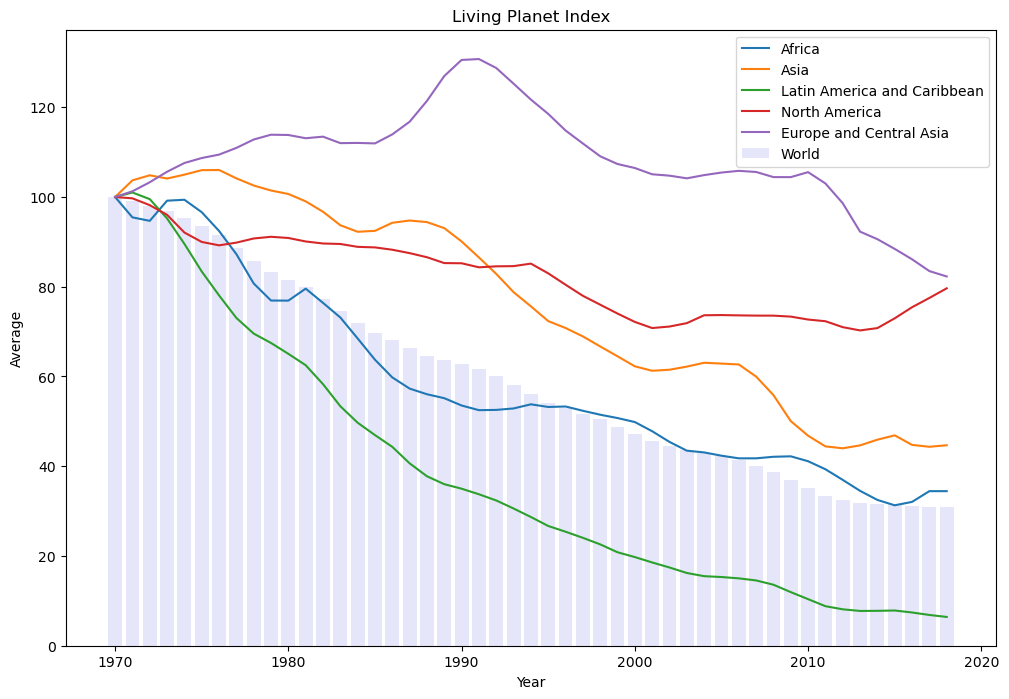

In [22]:
plt.figure(figsize=(12,8))
plt.title('Living Planet Index')
plt.xlabel('Year')
plt.ylabel('Average')
plt.plot(africa['Year'], africa['Average Index'])
plt.plot(asia['Year'], asia['Average Index'])
plt.plot(latin['Year'], latin['Average Index'])
plt.plot(nam['Year'], nam['Average Index'])
plt.plot(euro['Year'], euro['Average Index'])
plt.bar(world['Year'], world['Average Index'], color='lavender')
plt.legend(['Africa', 'Asia', 'Latin America and Caribbean', 'North America', 'Europe and Central Asia', 'World'])

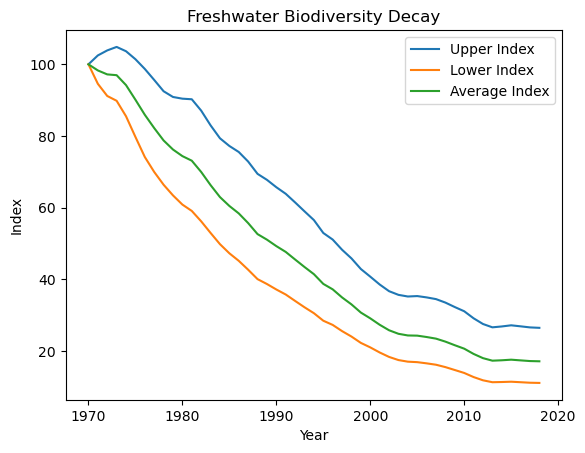

In [17]:
plt.title('Freshwater Biodiversity Decay')
plt.xlabel('Year')
plt.ylabel('Index')
plt.plot(fresh['Year'], fresh['Upper Index'])
plt.plot(fresh['Year'], fresh['Lower Index'])
plt.plot(fresh['Year'], fresh['Average Index'])
plt.legend(['Upper Index', 'Lower Index', 'Average Index'])